In [8]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Artificial Dataset

### make_regression
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [9]:
from sklearn.datasets import make_regression

In [10]:
X, Y = make_regression(n_samples=100, n_features=10)

In [11]:
X.shape

(100, 10)

In [12]:
Y.shape

(100,)

In [13]:
Y

array([-174.59865024, -179.04805242,  -15.83111716, -141.40595149,
          5.55382553, -261.70089182,  153.10182729,  160.28087095,
       -210.16341958,  -85.37715611,  -62.08242037,  210.52763211,
         80.86906671,   86.26670256,  -31.219271  ,  -60.32571614,
        134.59252988, -270.94271899,   16.84453699, -144.46142956,
        238.02072145,  122.62453755,  -26.39529373,  -74.39939079,
        -62.3892839 ,  215.57813495, -236.12566406,   66.63206108,
       -222.48413444, -253.39772927,   68.19503783,   -6.6676555 ,
        158.48793867, -257.28871292, -309.13505642, -206.29096621,
        -32.23020499,  364.62838806,  194.79154771,  -31.59196177,
         66.76793914,  269.02825427, -156.31555385,   25.71244698,
       -271.5816964 ,   53.57954573,  -27.563762  ,  434.26079269,
        243.76933768,  -14.74108092, -118.30129872,  170.63387162,
         17.58596606,  134.92088502,  191.30238272,  217.33103433,
       -192.95702954, -160.78850187, -268.75645774,  -60.27197

In [14]:
df_features = pd.DataFrame(X, columns=['f1', 'f2', 
                                       'f3', 'f4', 
                                       'f5', 'f6', 
                                       'f7', 'f8', 
                                       'f9', 'f10'])

df_target = pd.DataFrame(Y, columns=["target"])

In [15]:
reg_df = pd.concat([df_features, df_target], axis=1)

In [16]:
reg_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,-0.653117,0.643916,0.480449,0.389653,-1.889219,-1.214054,1.758422,0.065240,0.604464,-0.906054,-174.598650
1,-0.255941,0.613996,-1.706956,-0.356166,0.328502,0.380118,-0.271909,-0.722604,0.639503,0.058563,-179.048052
2,-0.766501,1.522146,1.556340,-1.003226,-0.250021,-1.134144,0.195019,0.766007,-0.520595,0.519385,-15.831117
3,-0.225584,1.296745,-0.791705,-1.187228,-0.164751,1.043081,-0.843146,-0.543745,0.680330,0.806345,-141.405951
4,0.075428,-2.216893,-0.709924,-0.585729,1.689035,-0.545380,-1.734185,0.989195,0.067967,0.466642,5.553826


### make_classification
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

In [17]:
from sklearn.datasets import make_classification

In [18]:
X, Y = make_classification(n_samples=100, 
                           n_features=10, 
                           n_classes=2)

In [19]:
X.shape

(100, 10)

In [20]:
Y.shape

(100,)

In [21]:
df_features = pd.DataFrame(X, columns=['f1', 'f2', 
                                       'f3', 'f4', 
                                       'f5', 'f6', 
                                       'f7', 'f8', 
                                       'f9', 'f10'])

df_target = pd.DataFrame(Y, columns=["labels"])

In [22]:
clf_df = pd.concat([df_features, df_target], axis=1)

In [23]:
clf_df.sample(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,labels
39,0.076819,0.921947,-0.898401,0.752510,0.827326,0.183131,0.656183,-0.558807,-0.350246,-0.236187,1
23,0.208349,-1.026549,-1.803764,-0.950345,0.458252,-0.525124,-1.816894,-1.451661,0.432871,0.218699,0
73,-0.384842,0.832475,-0.285214,-0.807574,0.089675,1.258493,0.101220,0.442047,0.250861,-0.798868,1
30,-1.458766,-0.950122,-1.805806,-1.144216,0.352317,1.415533,1.706521,-0.911193,0.501564,0.098207,0
13,-1.312306,0.902501,-1.234070,-1.682948,0.972404,0.863509,0.952507,-1.185246,0.579897,-1.184038,1


### make_low_rank_matrix
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_low_rank_matrix.html#sklearn.datasets.make_low_rank_matrix

In [24]:
from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

In [25]:
def variance_plt(n_samples=100, 
                 n_features=10, 
                 effective_rank=2, 
                 tail_strength=0.5):
    
    X = make_low_rank_matrix(n_samples=n_samples, 
                             n_features=n_features, 
                             effective_rank=effective_rank, 
                             tail_strength=tail_strength)
    
    pca = PCA(n_components=n_features)
    X_reduced = pca.fit_transform(X)
    
    cum_variance = np.cumsum(pca.explained_variance_ratio_)
    print('Cumulative Variance:\n', cum_variance)
    
    plt.plot(cum_variance)
    plt.xlabel('n components')
    plt.ylabel('cumulative variance')
    
    return {'matrix' : X, 'pca_model' : pca}


Cumulative Variance:
 [0.53626544 0.86846023 0.96398198 0.98135376 0.98649198 0.98988529
 0.99282455 0.99548936 0.99781044 1.        ]


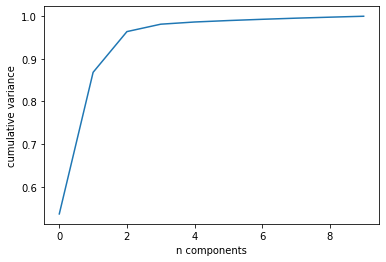

In [26]:
plot = variance_plt(tail_strength=0.1)

plt.show()

In [27]:
plot['pca_model'].explained_variance_

array([1.00514623e-02, 6.22647506e-03, 1.79040687e-03, 3.25606982e-04,
       9.63080330e-05, 6.36021827e-05, 5.50919198e-05, 4.99477546e-05,
       4.35050935e-05, 4.10398184e-05])

Cumulative Variance:
 [0.4822951  0.80092099 0.90410958 0.9361253  0.9512093  0.96302624
 0.97365988 0.98332361 0.99207248 1.        ]


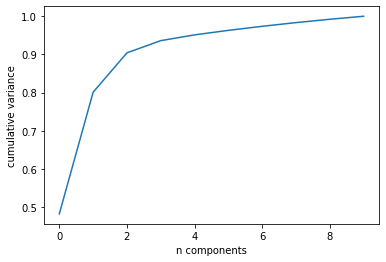

In [28]:
plot_1 = variance_plt(tail_strength=0.2)

plt.show()

Cumulative Variance:
 [0.42758502 0.70903501 0.82891448 0.87516948 0.90336212 0.92694846
 0.9480587  0.96699493 0.98432271 1.        ]


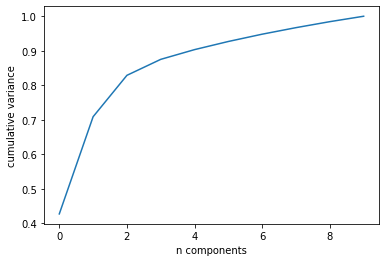

In [29]:
plot_2 = variance_plt(tail_strength=0.3)

plt.show()

Cumulative Variance:
 [0.27340427 0.47886632 0.60825555 0.69171817 0.75899409 0.81729967
 0.87075108 0.91965162 0.9604459  1.        ]


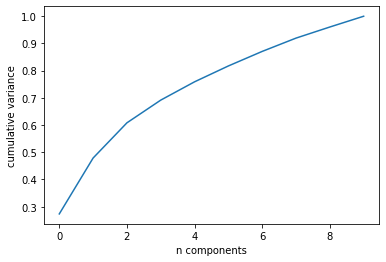

In [30]:
plot_5 = variance_plt(tail_strength=0.6)

plt.show()

Cumulative Variance:
 [0.17694278 0.32781164 0.4458802  0.55489606 0.64873199 0.73373345
 0.80786604 0.87912203 0.94176001 1.        ]


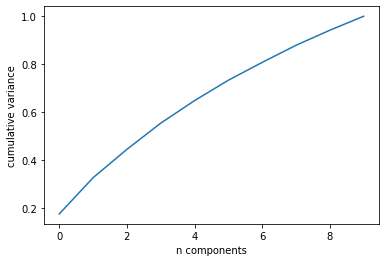

In [31]:
plot_8 = variance_plt(tail_strength=0.9)

plt.show()

### make_blobs
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [41]:
from sklearn.datasets import make_blobs

In [50]:
X, Y = make_blobs(n_samples=200, centers=5, n_features=2)

In [51]:
X.shape, Y.shape

((200, 2), (200,))

In [52]:
Y

array([1, 2, 3, 4, 4, 0, 4, 0, 1, 0, 3, 2, 2, 3, 2, 0, 0, 1, 0, 3, 4, 3,
       4, 1, 2, 0, 2, 1, 2, 0, 2, 0, 4, 2, 2, 1, 2, 1, 4, 2, 3, 1, 1, 3,
       4, 2, 2, 2, 0, 2, 1, 1, 4, 2, 1, 0, 3, 1, 0, 1, 3, 2, 2, 4, 0, 2,
       3, 3, 3, 4, 2, 1, 4, 2, 4, 0, 2, 4, 3, 1, 0, 2, 4, 2, 1, 1, 1, 0,
       3, 3, 0, 1, 1, 0, 0, 0, 2, 3, 4, 3, 0, 0, 3, 3, 1, 3, 0, 4, 3, 4,
       4, 2, 4, 4, 3, 2, 1, 0, 0, 0, 4, 0, 3, 4, 3, 1, 2, 1, 1, 4, 0, 4,
       4, 3, 0, 3, 0, 4, 1, 0, 4, 2, 4, 1, 3, 4, 3, 2, 0, 4, 2, 0, 3, 0,
       1, 1, 1, 2, 3, 0, 2, 4, 4, 3, 1, 4, 0, 2, 3, 3, 4, 3, 0, 1, 4, 3,
       1, 3, 3, 2, 1, 0, 4, 0, 2, 2, 1, 1, 1, 4, 4, 4, 1, 3, 0, 3, 3, 2,
       1, 2])

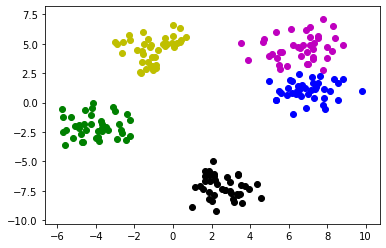

In [53]:
for i in range(len(X)):
    colors = ['k', 'b', 'g', 'y', 'm', 'c']
    plt.scatter(X[i][0], X[i][1], c=colors[Y[i]])
    
plt.show()

### make_circles
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

In [54]:
from sklearn.datasets import make_circles

In [85]:
X, color = make_circles(n_samples=200, noise=0.05, factor=0.5)

In [86]:
X.shape

(200, 2)

In [87]:
color.shape

(200,)

In [88]:
color

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0])

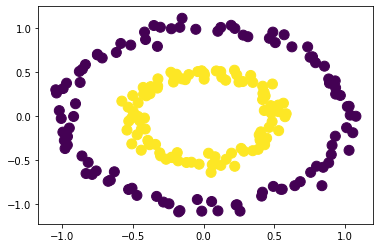

In [89]:
plt.scatter(X[:, 0], X[:, 1], c=color, s=100)

plt.show()

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, color_train, color_test = \
        train_test_split(X, color, test_size=0.3)

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
svc_model = DecisionTreeClassifier(max_depth=10).fit(x_train, color_train)

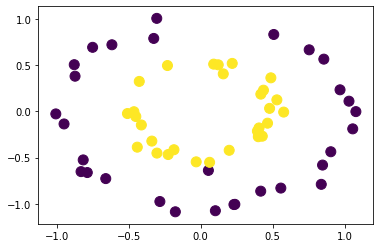

In [93]:
color_pred = svc_model.predict(x_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=color_pred, s=100)

plt.show()

In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(color_test, color_pred)

0.9833333333333333

### make_s_curve
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve

In [95]:
from sklearn.datasets import make_s_curve

In [96]:
X, color = make_s_curve(n_samples=1000)

In [97]:
X.shape

(1000, 3)

In [98]:
color.shape

(1000,)

In [99]:
from mpl_toolkits.mplot3d import Axes3D

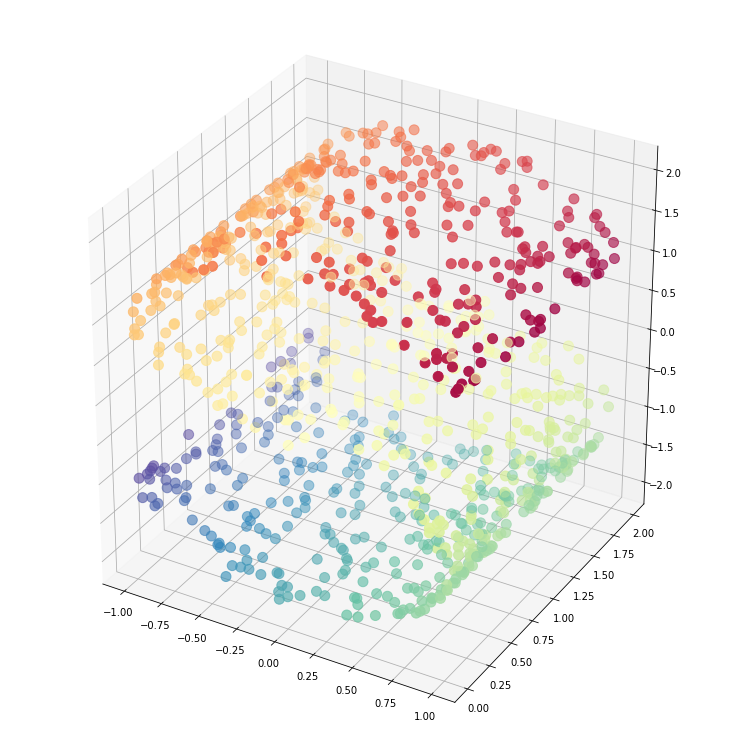

In [100]:
fig = plt.figure(figsize=(75, 30))

ax = fig.add_subplot(251, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           c=color, 
           cmap=plt.cm.Spectral, s=100)

plt.show()

### LocallyLinearEmbedding
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

In [101]:
from sklearn.manifold import LocallyLinearEmbedding

In [103]:
model = LocallyLinearEmbedding(n_neighbors = 15, 
                               n_components = 2, 
                               method = 'hessian')
lle = model.fit_transform(X)

In [104]:
lle

array([[-0.03503178, -0.0534723 ],
       [ 0.03919502, -0.00859159],
       [-0.01095069, -0.03092297],
       ...,
       [ 0.03618638, -0.01566617],
       [-0.02191543,  0.04855077],
       [ 0.00976344, -0.01111426]])

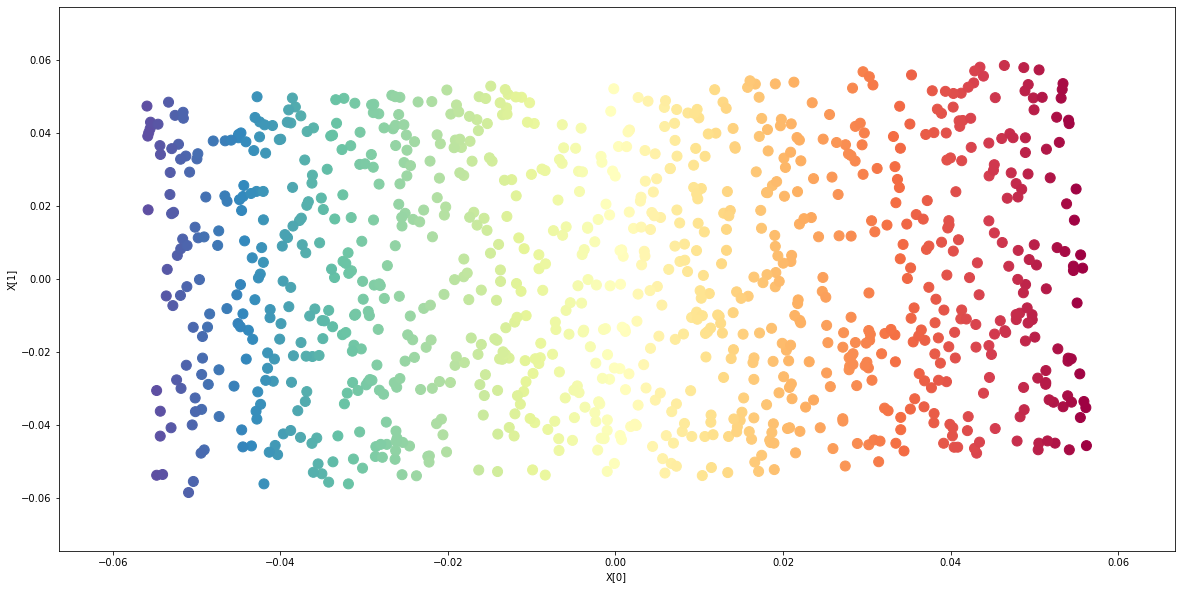

In [105]:
plt.figure(figsize=(20, 10))

plt.scatter(lle[:,0], lle[:,1], 
            c = color, 
            cmap = plt.cm.Spectral, 
            s=100)

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()

### make_swiss_roll
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll

In [106]:
from sklearn.datasets import make_swiss_roll

In [107]:
X, color = make_swiss_roll(n_samples=1000)

In [108]:
X.shape

(1000, 3)

In [109]:
color.shape

(1000,)

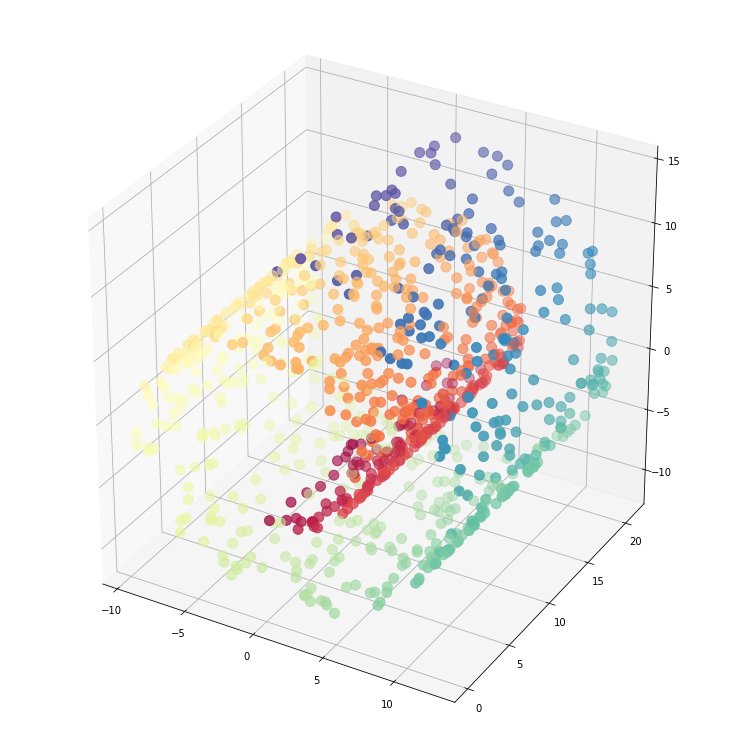

In [110]:
fig = plt.figure(figsize=(75, 30))

ax = fig.add_subplot(251, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=100)

plt.show()

In [111]:
from sklearn.manifold import Isomap

In [112]:
model = Isomap(n_neighbors = 10, n_components = 2)
iso = model.fit_transform(X)

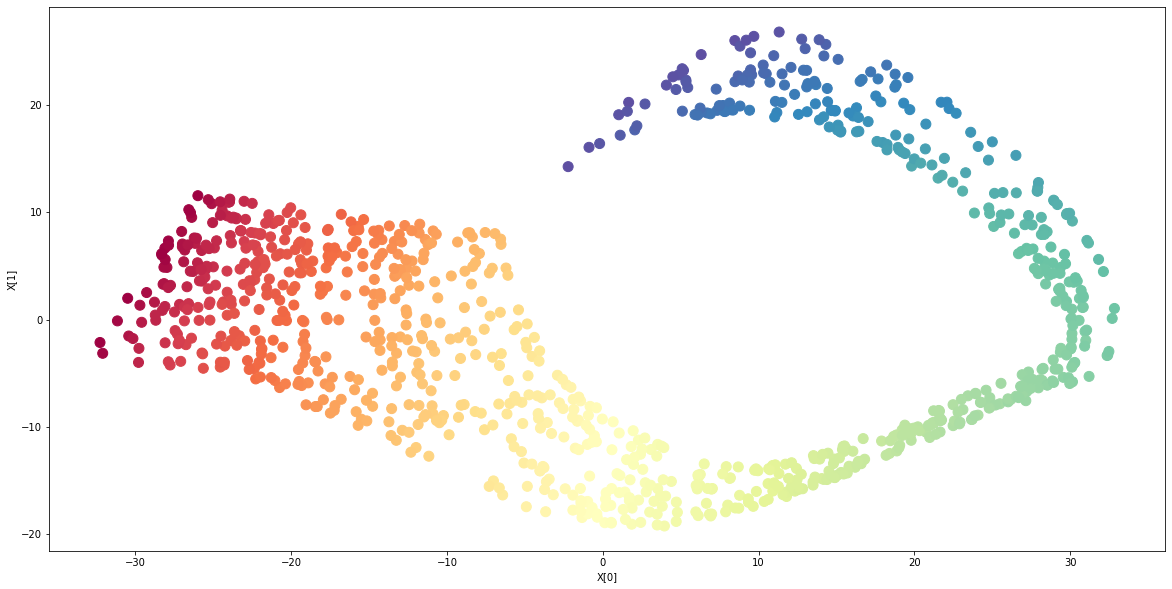

In [113]:
plt.figure(figsize=(20, 10))

plt.scatter(iso[:,0], iso[:,1], c = color, cmap = plt.cm.Spectral, s=100)

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()